In [1]:
%matplotlib inline 

In [2]:
import os, shutil
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from seaborn import despine
from sklearn.preprocessing import OneHotEncoder

In [4]:
#scrapping the data from its github host
url = 'https://raw.githubusercontent.com/mn20781/Predicting-Students-Grades/main/data.csv'
#reading the data as a csv and storing dataframe in 'data' variable. 
data = pd.read_csv(url, header=0,skiprows=0, delimiter = ';')   

In [5]:
data #calling data to preview it's contents

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [6]:
#first we read the dataset 
#data = pd.read_csv('/Users/michael_temporary/downloads/data.csv',
                   #header=0,skiprows=0, delimiter = ';')
#data

In [7]:
data.columns #previewing all column names

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [8]:
#data.isnan()

In [9]:
data.head(n=5)#check the data in the first 5 rows 

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [25]:
data['Marital status'].value_counts() #some exploratory data analysis 

1    3919
2     379
4      91
5      25
6       6
3       4
Name: Marital status, dtype: int64

In [26]:
data["Mother's occupation"].value_counts()

9      1577
4       817
5       530
3       351
2       318
7       272
0       144
1       102
6        91
90       70
8        36
191      26
99       17
194      11
141       8
123       7
144       6
175       5
192       5
193       4
134       4
10        4
143       3
151       3
132       3
152       2
122       2
153       2
173       1
125       1
131       1
171       1
Name: Mother's occupation, dtype: int64

In [27]:
"""Get the target labels and store them in 'target'. This is prestep to using 
   a label binarizer to store the labels into binary"""

target = data['Target']

In [76]:
#convert the target labels into binary using dummy variables 
dummy_targets = pd.get_dummies(target)

In [36]:
#check the dummy targets have been saved
dummy_targets

,Dropout,Enrolled,Graduate
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
4419,0,0,1
4420,1,0,0
4421,1,0,0
4422,0,0,1


In [37]:
#add the dummy variables to the original dataframe
data = pd.concat([data, dummy_targets], axis=1)

In [38]:
#preview the new dataframe 
data.head(n=5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Dropout,Enrolled,Graduate
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0.000000,0,10.8,1.4,1.74,Dropout,1,0,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,13.666667,0,13.9,-0.3,0.79,Graduate,0,0,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0.000000,0,10.8,1.4,1.74,Dropout,1,0,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,5,12.400000,0,9.4,-0.8,-3.12,Graduate,0,0,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,13.000000,0,13.9,-0.3,0.79,Graduate,0,0,1


In [62]:
#encode target labels into binary form with label binarizer 
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(target)
binarized_labels = lb.transform(target)
#lb.classes_
#lb_classes = lb.classes_
#encoding the labels into numerical data, to then be one hot encoded 
#labelencoder = LabelEncoder()
#data['Target Encoded']= labelencoder.fit_transform(data['Target'])
#data

In [67]:
type(binarized_labels)

numpy.ndarray

In [33]:
#store the classes that have been binarized into lb_classes
#lb_classes = lb.classes_

In [28]:
#lb_targets = lb.transform(['Dropout', 'Enrolled', 'Graduate'])

In [23]:
#lb_targets

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [39]:
#data['binary_targets'] = lb_targets

In [40]:
#check for missing values
data.isnull().any()

Marital status                                    False
Application mode                                  False
Application order                                 False
Course                                            False
Daytime/evening attendance\t                      False
Previous qualification                            False
Previous qualification (grade)                    False
Nacionality                                       False
Mother's qualification                            False
Father's qualification                            False
Mother's occupation                               False
Father's occupation                               False
Admission grade                                   False
Displaced                                         False
Educational special needs                         False
Debtor                                            False
Tuition fees up to date                           False
Gender                                          

In [43]:
#replaces naan values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [44]:
#drop the target column so we are only left with numerical values
school_num = data.drop('Target', axis =1)

In [45]:
imputer.fit(school_num)

SimpleImputer(strategy='median')

In [13]:
imputer.statistics_

array([1.00000000e+00, 1.70000000e+01, 1.00000000e+00, 9.23800000e+03,
       1.00000000e+00, 1.00000000e+00, 1.33100000e+02, 1.00000000e+00,
       1.90000000e+01, 1.90000000e+01, 5.00000000e+00, 7.00000000e+00,
       1.26100000e+02, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.00000000e+01,
       0.00000000e+00, 0.00000000e+00, 6.00000000e+00, 8.00000000e+00,
       5.00000000e+00, 1.22857143e+01, 0.00000000e+00, 0.00000000e+00,
       6.00000000e+00, 8.00000000e+00, 5.00000000e+00, 1.22000000e+01,
       0.00000000e+00, 1.11000000e+01, 1.40000000e+00, 3.20000000e-01,
       1.00000000e+00])

In [14]:
school_num.median().values

array([1.00000000e+00, 1.70000000e+01, 1.00000000e+00, 9.23800000e+03,
       1.00000000e+00, 1.00000000e+00, 1.33100000e+02, 1.00000000e+00,
       1.90000000e+01, 1.90000000e+01, 5.00000000e+00, 7.00000000e+00,
       1.26100000e+02, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.00000000e+01,
       0.00000000e+00, 0.00000000e+00, 6.00000000e+00, 8.00000000e+00,
       5.00000000e+00, 1.22857143e+01, 0.00000000e+00, 0.00000000e+00,
       6.00000000e+00, 8.00000000e+00, 5.00000000e+00, 1.22000000e+01,
       0.00000000e+00, 1.11000000e+01, 1.40000000e+00, 3.20000000e-01,
       1.00000000e+00])

In [46]:
school_num

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Dropout,Enrolled,Graduate
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0.000000,0,10.8,1.4,1.74,1,0,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,13.666667,0,13.9,-0.3,0.79,0,0,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,0.000000,0,10.8,1.4,1.74,1,0,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,10,5,12.400000,0,9.4,-0.8,-3.12,0,0,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,13.000000,0,13.9,-0.3,0.79,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,8,5,12.666667,0,15.5,2.8,-4.06,0,0,1
4420,1,1,2,9773,1,1,120.0,105,1,1,...,6,2,11.000000,0,11.1,0.6,2.02,1,0,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,9,1,13.500000,0,13.9,-0.3,0.79,1,0,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,6,5,12.000000,0,9.4,-0.8,-3.12,0,0,1


In [47]:
#set train and test sets of the data
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [48]:
len(train_set)

3539

In [49]:
len(test_set)

885

In [50]:
train_test_copy = train_set.copy()

In [51]:
attr = ['']

In [52]:
#data['Tuition fees up to date'], data['Marital status']

In [53]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Dropout,Enrolled,Graduate
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,0.321203,0.179476,0.499322
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.466991,0.383793,0.500056
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000,0.000000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,0.000000,0.000000,0.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,1.000000,0.000000,1.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,1.000000,1.000000,1.000000


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 40 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

/opt/miniconda3/envs/schoolwork/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


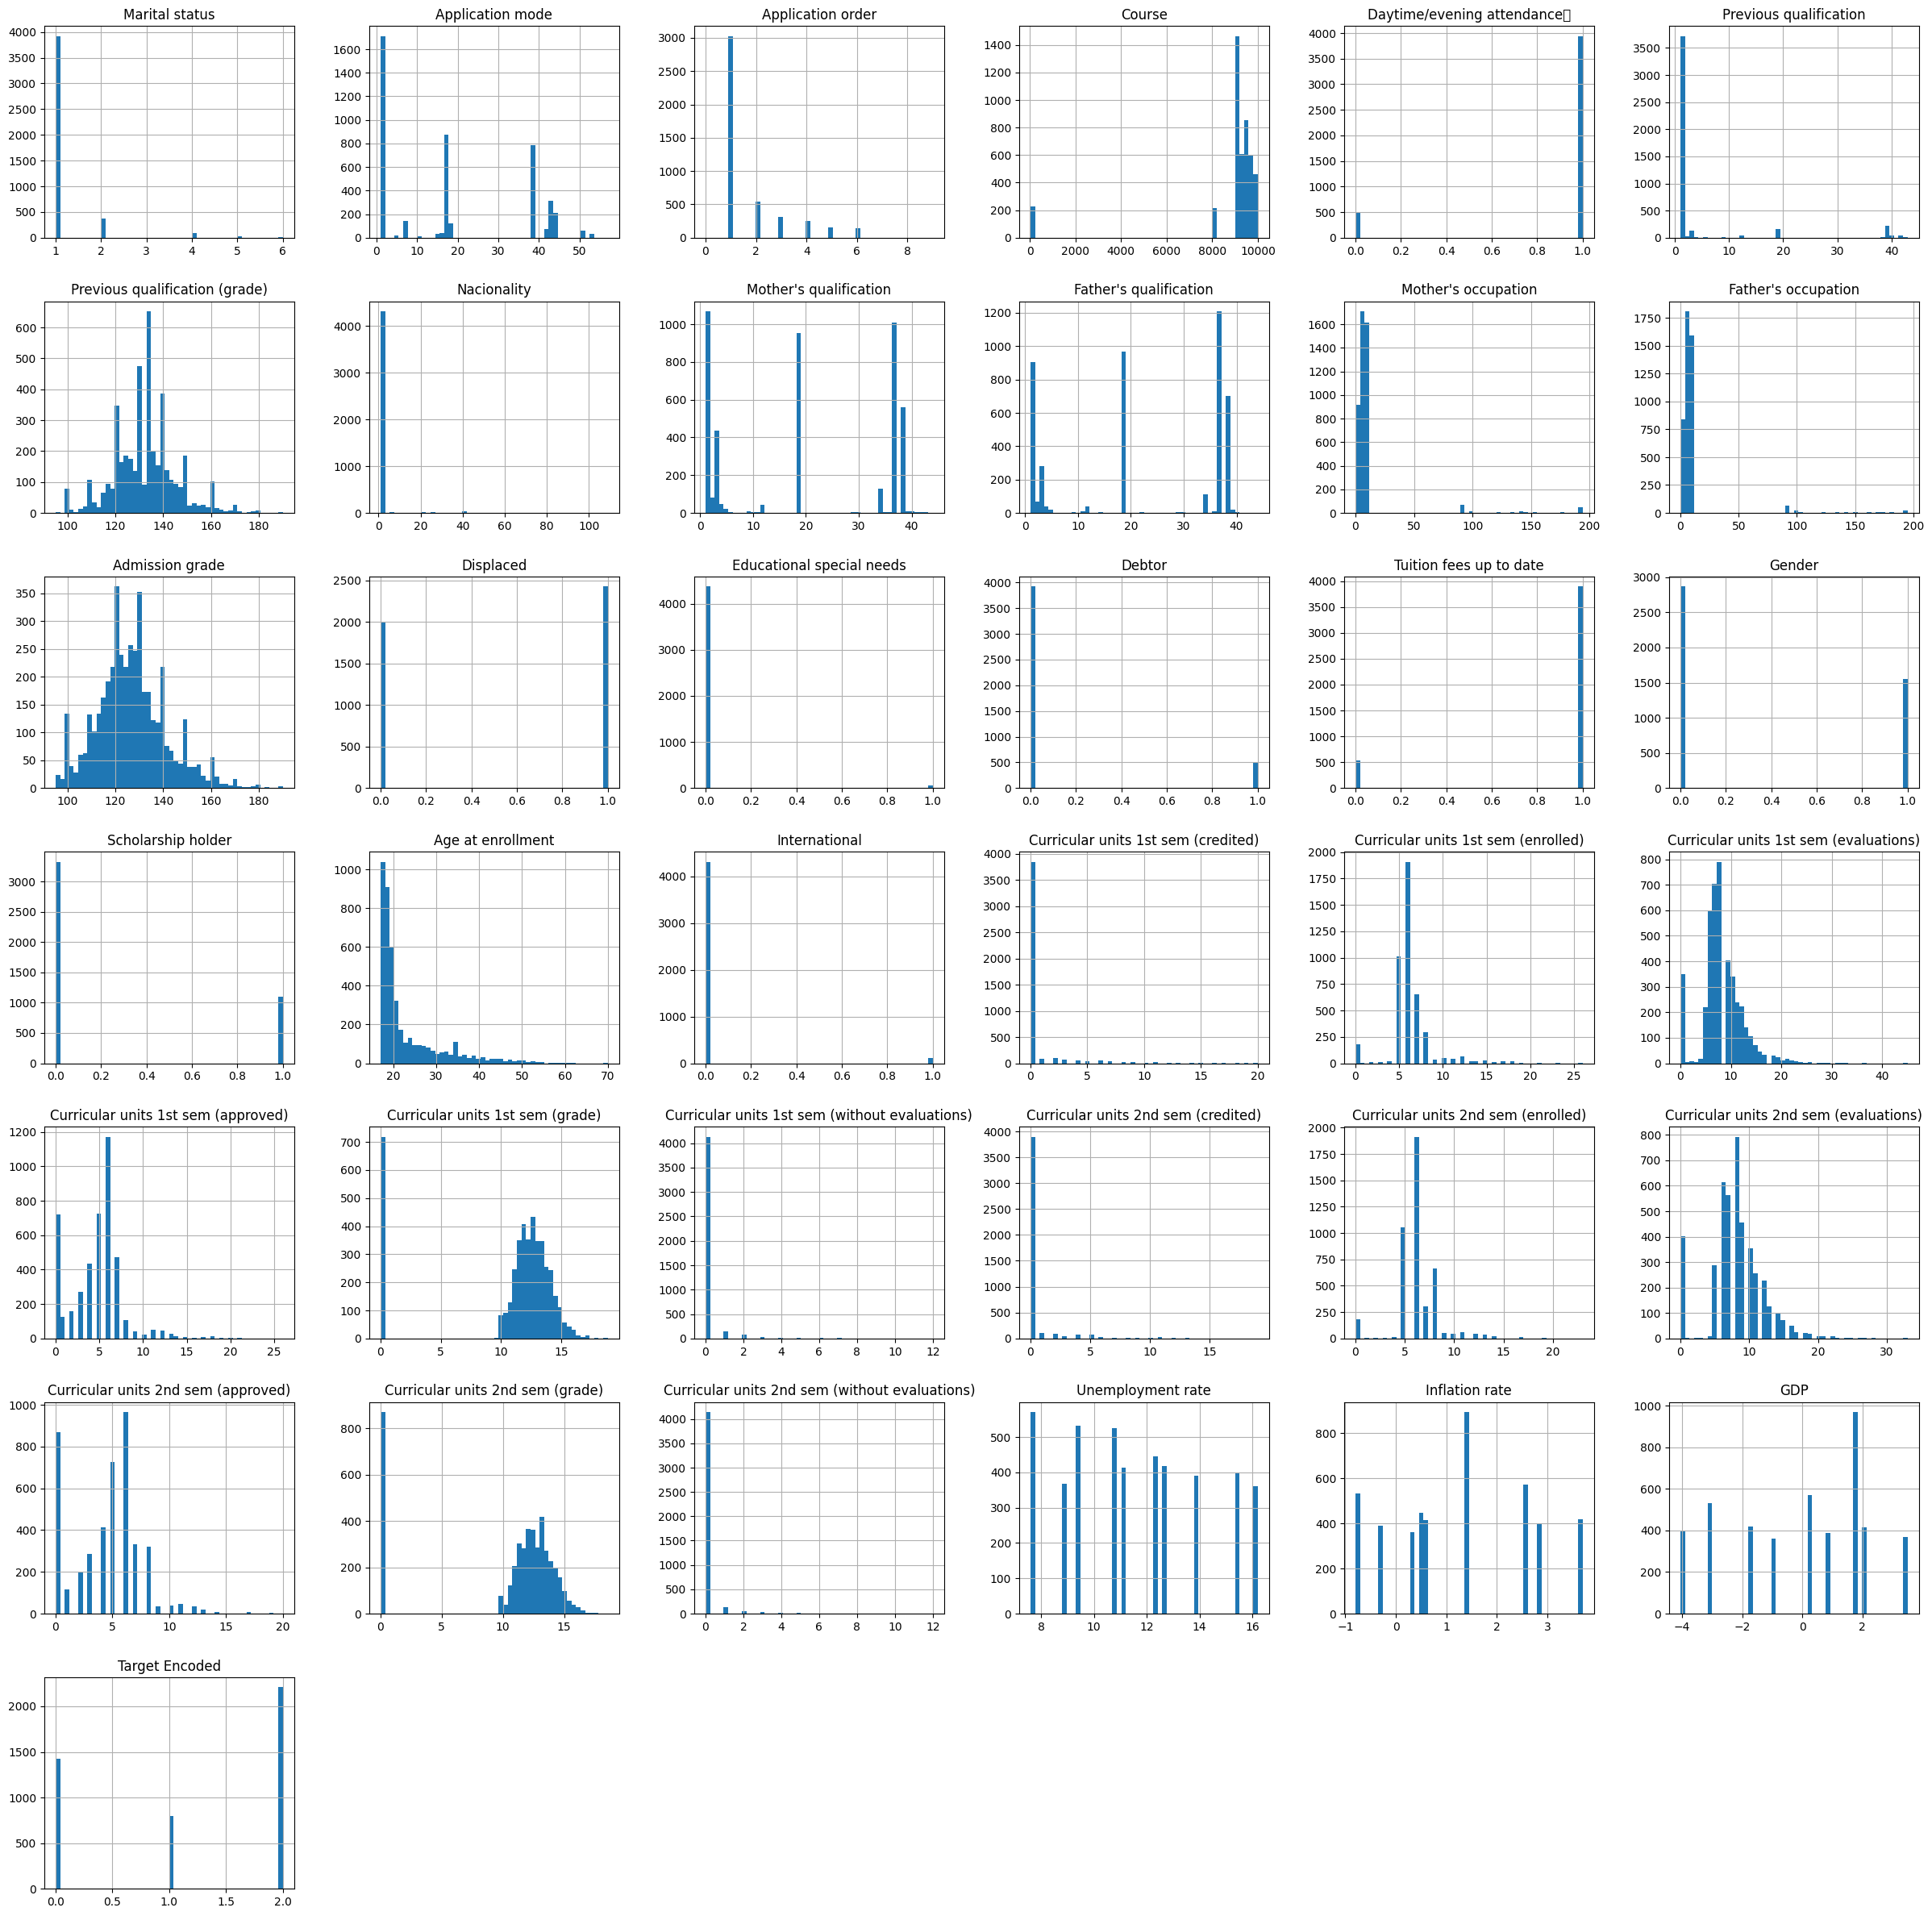

In [25]:
#histogram of values 
data.hist(bins=50, figsize=(30,30))
plt.show()

In [55]:
#store 'data' in the 'df' variable 
df=data

array([[<AxesSubplot:title={'center':'Marital status'}>,
        <AxesSubplot:title={'center':'Application mode'}>,
        <AxesSubplot:title={'center':'Application order'}>,
        <AxesSubplot:title={'center':'Course'}>,
        <AxesSubplot:title={'center':'Daytime/evening attendance\t'}>,
        <AxesSubplot:title={'center':'Previous qualification'}>],
       [<AxesSubplot:title={'center':'Previous qualification (grade)'}>,
        <AxesSubplot:title={'center':'Nacionality'}>,
        <AxesSubplot:title={'center':"Mother's qualification"}>,
        <AxesSubplot:title={'center':"Father's qualification"}>,
        <AxesSubplot:title={'center':"Mother's occupation"}>,
        <AxesSubplot:title={'center':"Father's occupation"}>],
       [<AxesSubplot:title={'center':'Admission grade'}>,
        <AxesSubplot:title={'center':'Displaced'}>,
        <AxesSubplot:title={'center':'Educational special needs'}>,
        <AxesSubplot:title={'center':'Debtor'}>,
        <AxesSubplot:title={'

/opt/miniconda3/envs/schoolwork/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/opt/miniconda3/envs/schoolwork/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


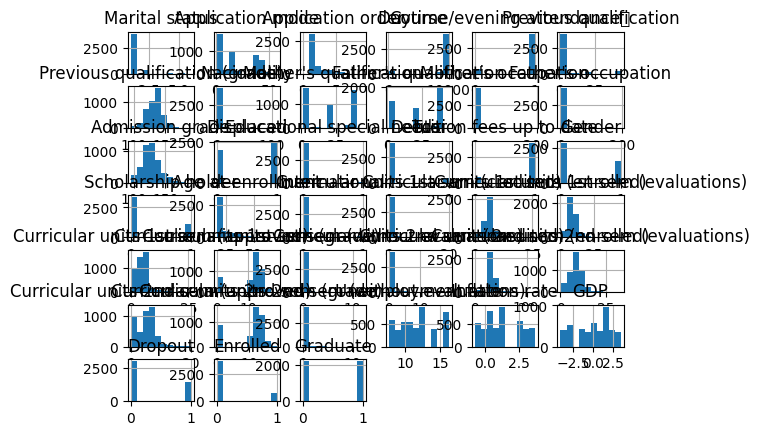

In [56]:
df.hist()

<AxesSubplot:>

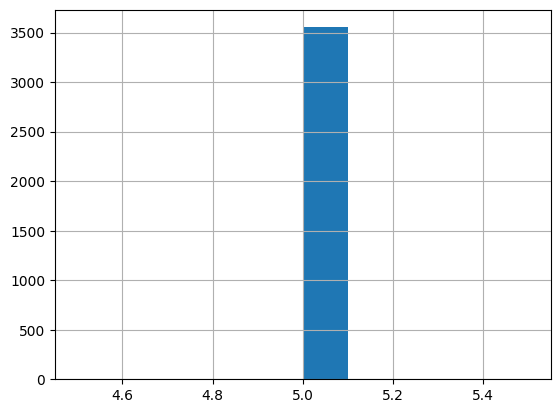

In [57]:
df['Curricular units 2nd sem (grades)'] =pd.cut(data['Curricular units 2nd sem (grade)'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
                                               labels=[1, 2, 3, 4, 5])
df['Curricular units 2nd sem (grades)'].hist()

In [26]:
#encoding the target data into a numerical format
type(data)

pandas.core.frame.DataFrame

In [77]:
#preview the values of 'Target'
data['Target'].values

array(['Dropout', 'Graduate', 'Dropout', ..., 'Dropout', 'Graduate',
       'Graduate'], dtype=object)

In [78]:
data.isnull().any() #check for missing values 

Marital status                                    False
Application mode                                  False
Application order                                 False
Course                                            False
Daytime/evening attendance\t                      False
Previous qualification                            False
Previous qualification (grade)                    False
Nacionality                                       False
Mother's qualification                            False
Father's qualification                            False
Mother's occupation                               False
Father's occupation                               False
Admission grade                                   False
Displaced                                         False
Educational special needs                         False
Debtor                                            False
Tuition fees up to date                           False
Gender                                          

In [59]:
#view unique labels in columns
for item in data.columns:
    print(item)
    print (data[item].unique())

Marital status
[1 2 4 3 5 6]
Application mode
[17 15  1 39 18 53 44 51 43  7 42 16  5  2 10 57 26 27]
Application order
[5 1 2 4 3 6 9 0]
Course
[ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119]
Daytime/evening attendance	
[1 0]
Previous qualification
[ 1 19 42 39 10  3 40  2  4 12 43 15  6  9 38  5 14]
Previous qualification (grade)
[122.  160.  100.  133.1 142.  119.  137.  138.  139.  136.  133.  110.
 149.  127.  135.  140.  125.  126.  151.  115.  150.  143.  130.  120.
 103.  154.  132.  167.  129.  141.  116.  148.  118.  106.  121.  114.
 124.  123.  113.  111.  131.  158.  146.  117.  153.  178.   99.  134.
 128.  170.  155.  145.  152.  112.  107.  156.  188.   96.  161.  166.
 147.  144.  102.  101.  180.  172.  105.  108.  165.  190.  162.  164.
 163.  159.  117.4 175.  133.8 176.  168.  139.3  97.  157.  140.8 184.4
 148.9 109.  174.  182.  138.6  95.  154.4 163.3 145.7 123.9 124.4 169.
 177.  138.7 119.1 118.9 126.6]
Nacionality
[  1 

In [79]:
#use a correlation matrix to see how attributes relate to each other 
corr_matrix = data.corr()

corr_matrix['Dropout'].sort_values(ascending=False)

Dropout                                           1.000000
Age at enrollment                                 0.254215
Debtor                                            0.229407
Gender                                            0.203983
Application mode                                  0.198458
Marital status                                    0.093712
Curricular units 2nd sem (without evaluations)    0.079901
Mother's qualification                            0.064958
Curricular units 1st sem (without evaluations)    0.054230
Previous qualification                            0.049379
Inflation rate                                    0.027826
Father's qualification                            0.018295
Unemployment rate                                 0.012980
Nacionality                                       0.008346
Educational special needs                         0.002806
International                                    -0.010360
Mother's occupation                              -0.0219

In [80]:
corr_matrix['Enrolled'].sort_values(ascending=False)

Enrolled                                          1.000000
Curricular units 2nd sem (evaluations)            0.162607
Curricular units 1st sem (evaluations)            0.116654
Tuition fees up to date                           0.095864
Curricular units 2nd sem (grade)                  0.079635
Mother's occupation                               0.066563
Father's occupation                               0.063434
Curricular units 1st sem (grade)                  0.046781
Gender                                            0.034214
Application mode                                  0.030247
Curricular units 1st sem (without evaluations)    0.027029
Curricular units 2nd sem (without evaluations)    0.023171
Daytime/evening attendance\t                      0.022073
International                                     0.016106
Nacionality                                       0.013946
GDP                                               0.010575
Educational special needs                         0.0101

In [81]:
corr_matrix['Graduate'].sort_values(ascending=False)

Graduate                                          1.000000
Curricular units 2nd sem (approved)               0.576840
Curricular units 1st sem (approved)               0.492443
Curricular units 2nd sem (grade)                  0.472864
Curricular units 1st sem (grade)                  0.412982
Tuition fees up to date                           0.327197
Scholarship holder                                0.299484
Curricular units 2nd sem (enrolled)               0.180197
Curricular units 1st sem (enrolled)               0.160661
Admission grade                                   0.125263
Previous qualification (grade)                    0.111278
Displaced                                         0.102329
Application order                                 0.093670
Curricular units 2nd sem (credited)               0.065073
Daytime/evening attendance\t                      0.058235
Curricular units 1st sem (credited)               0.058157
GDP                                               0.0351

<AxesSubplot:>

/opt/miniconda3/envs/schoolwork/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/opt/miniconda3/envs/schoolwork/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


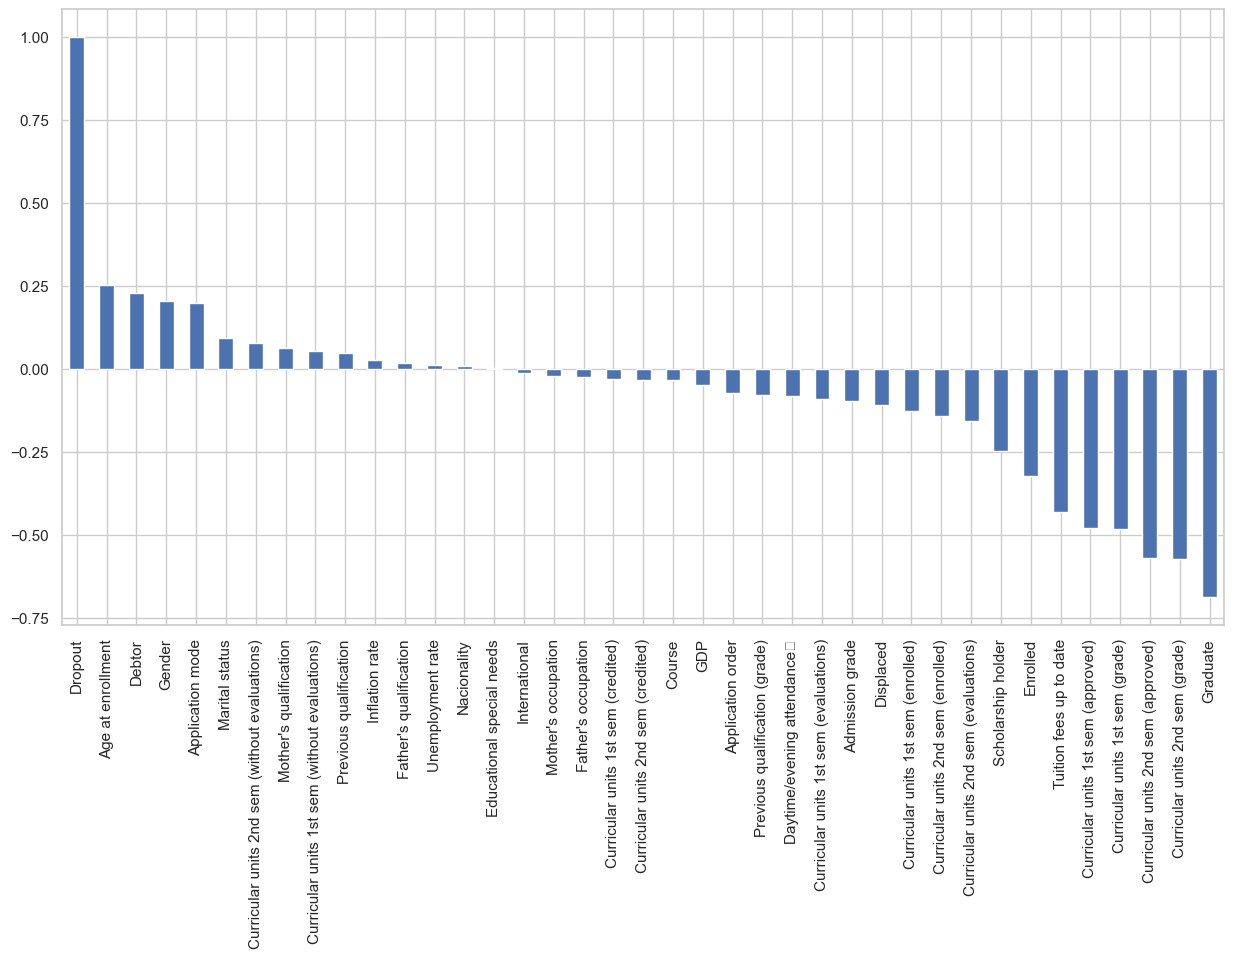

In [82]:
#visualising the correlation for the three target labels
plt.figure(figsize=(15,8))
data.corr()['Dropout'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

/opt/miniconda3/envs/schoolwork/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/opt/miniconda3/envs/schoolwork/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


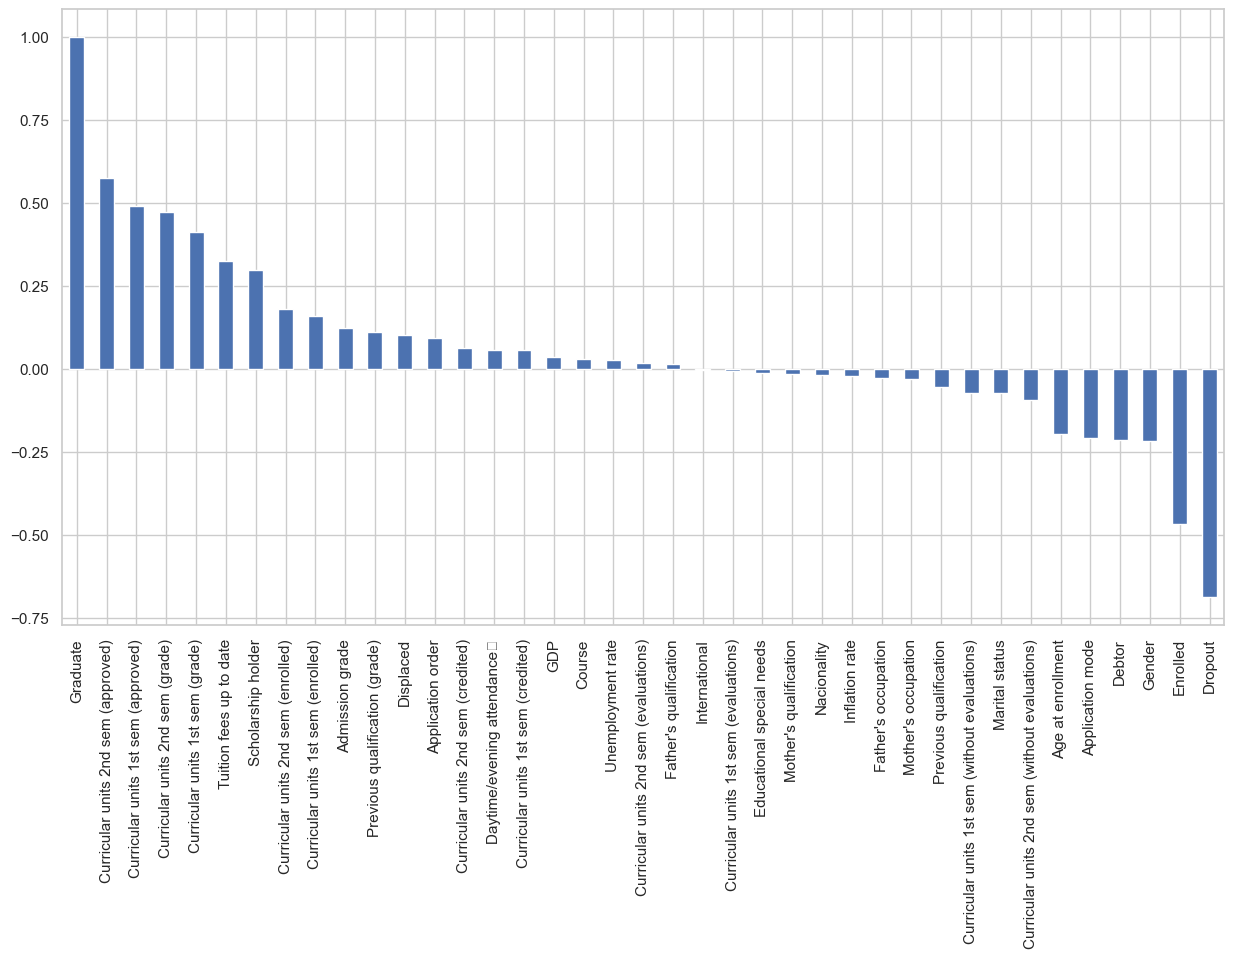

In [83]:
plt.figure(figsize=(15,8))
data.corr()['Graduate'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

/opt/miniconda3/envs/schoolwork/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/opt/miniconda3/envs/schoolwork/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


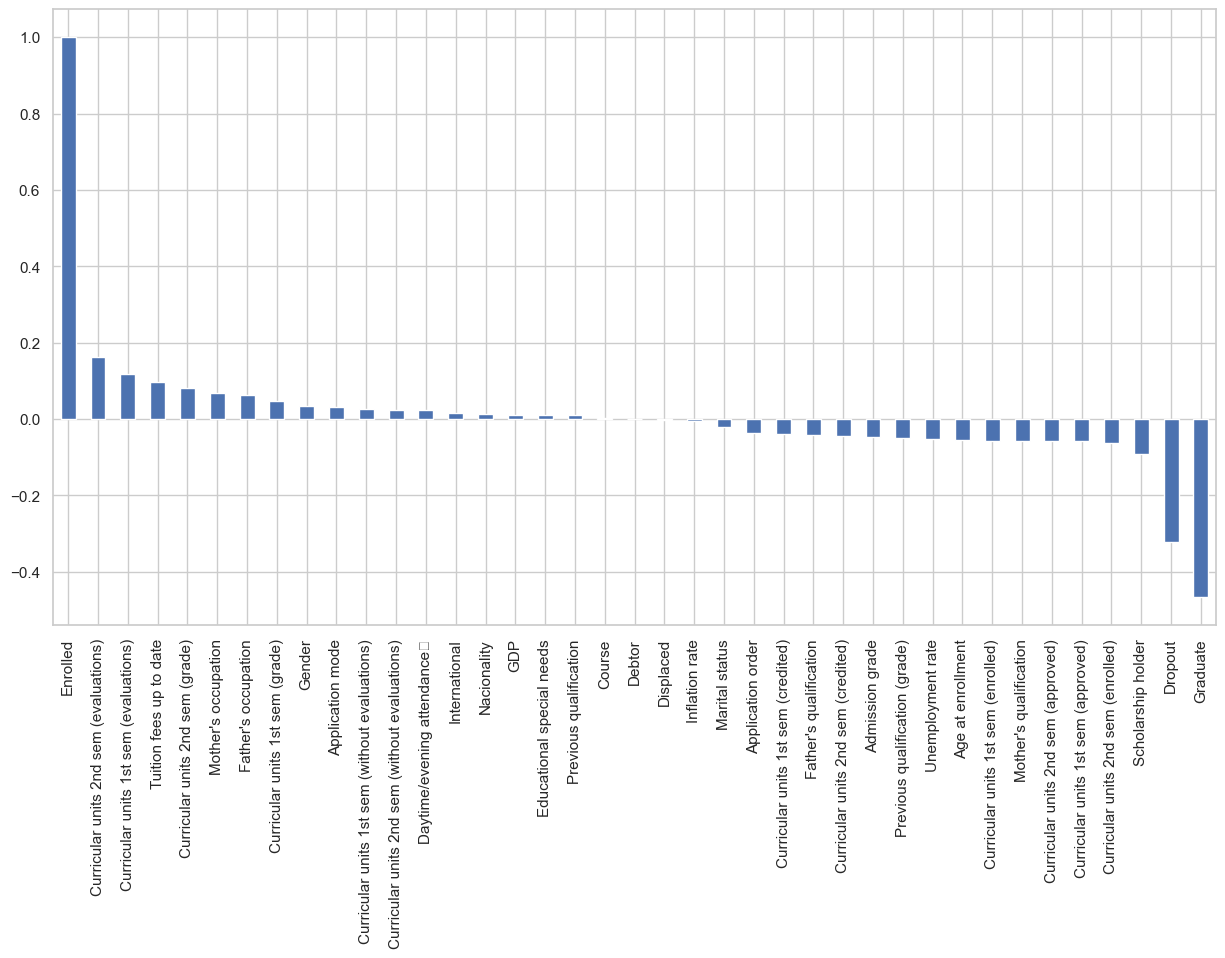

In [84]:
plt.figure(figsize=(15,8))
data.corr()['Enrolled'].sort_values(ascending = False).plot(kind='bar')

/opt/miniconda3/envs/schoolwork/lib/python3.8/site-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/opt/miniconda3/envs/schoolwork/lib/python3.8/site-packages/seaborn/utils.py:658: UserWarning: Glyph 9 (	) missing from current font.
  bboxes = [l.get_window_extent() for l in labels]


<AxesSubplot:>

/opt/miniconda3/envs/schoolwork/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/opt/miniconda3/envs/schoolwork/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


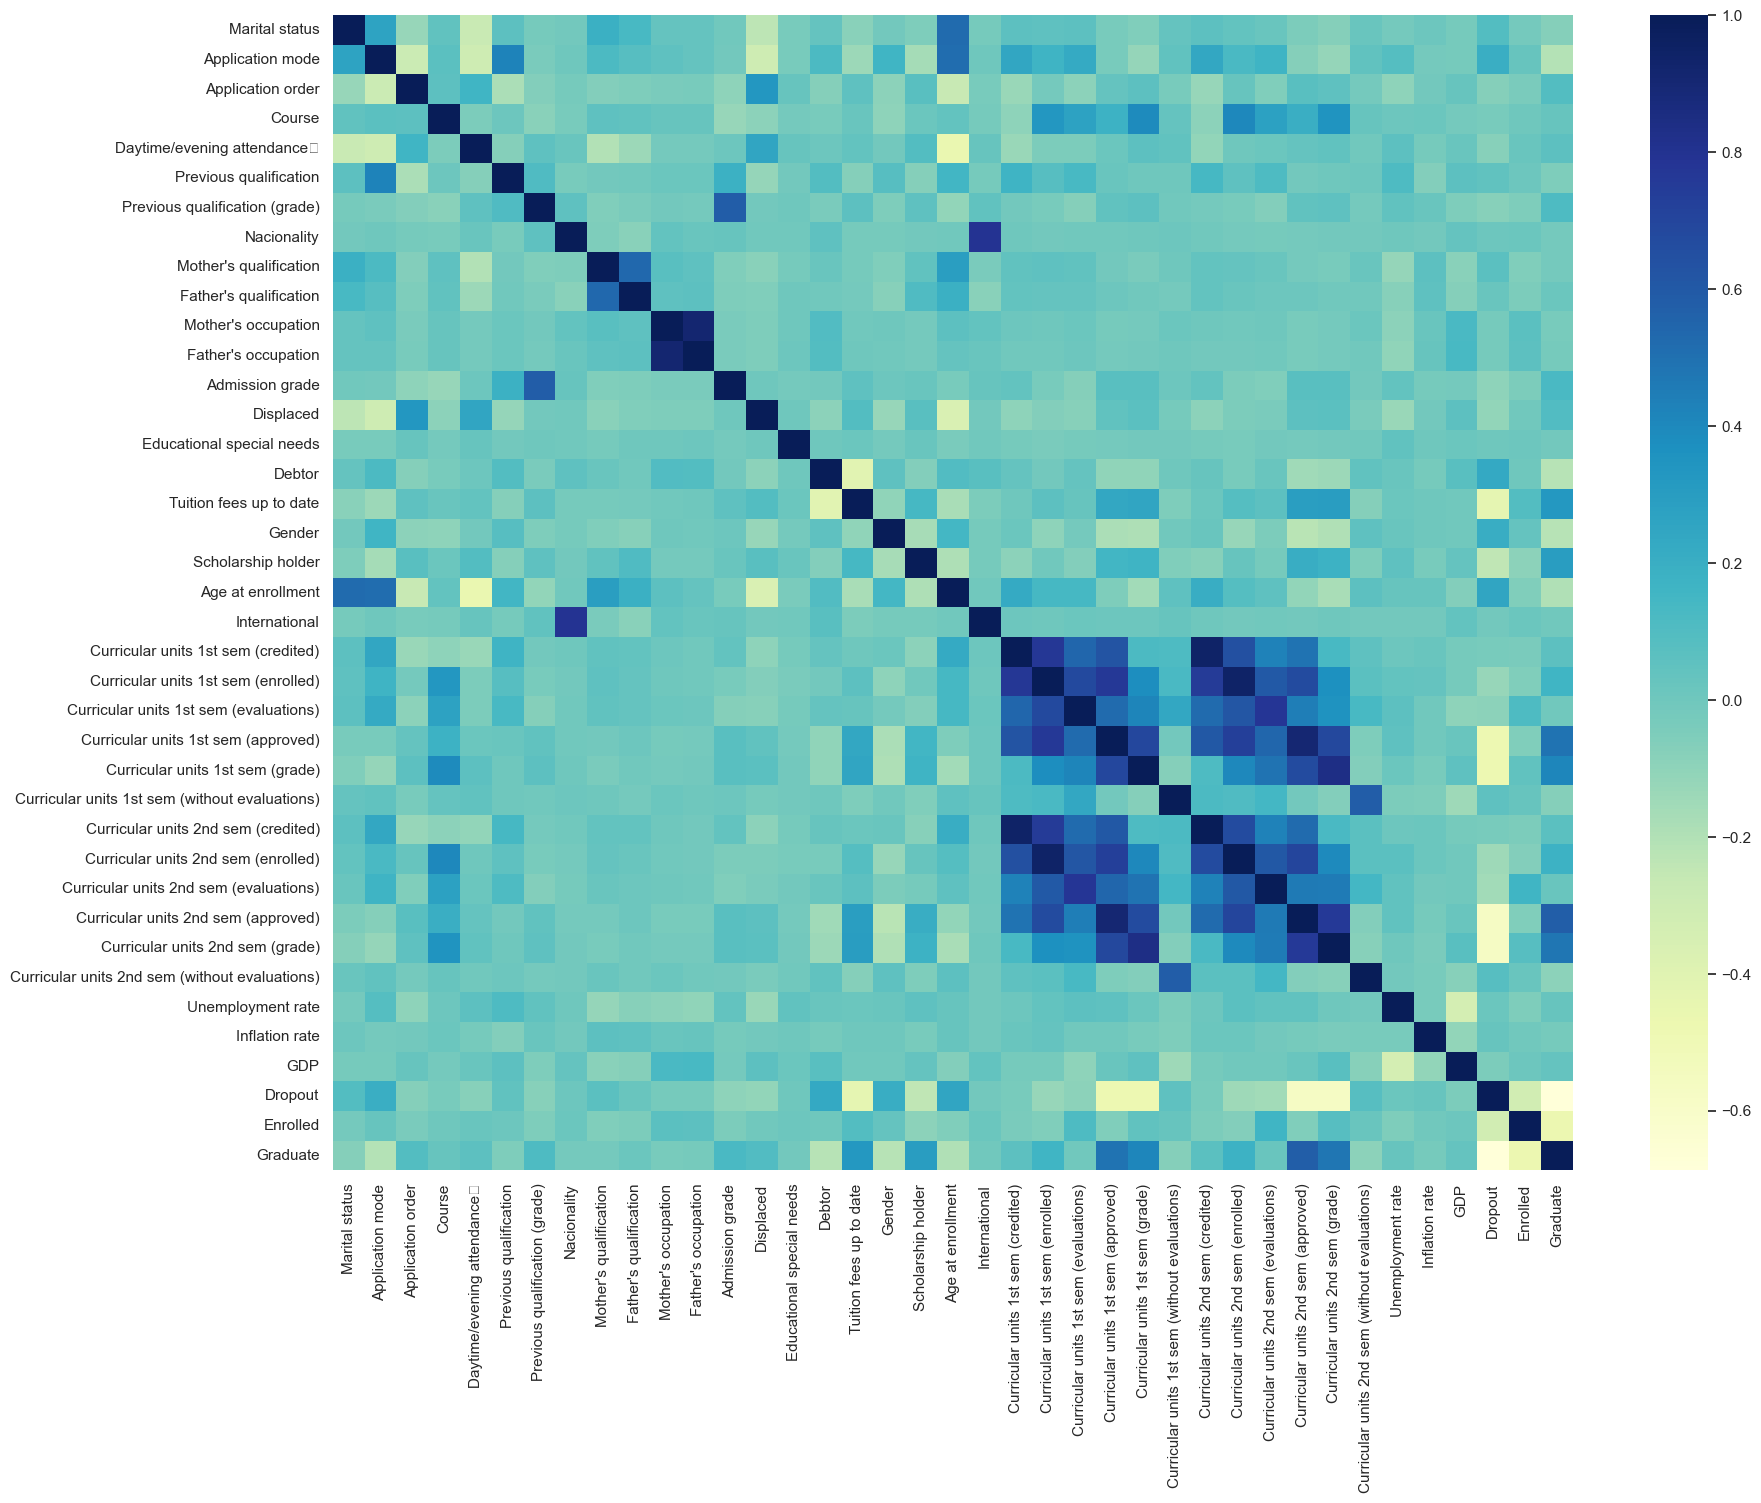

In [85]:
#correlation of features with each other 
corr=school_num.corr().iloc[:,:] 
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=False,cmap="YlGnBu")

array([[<AxesSubplot:xlabel='Curricular units 2nd sem (approved)', ylabel='Curricular units 2nd sem (approved)'>,
        <AxesSubplot:xlabel='Curricular units 2nd sem (grade)', ylabel='Curricular units 2nd sem (approved)'>,
        <AxesSubplot:xlabel='Curricular units 1st sem (approved)', ylabel='Curricular units 2nd sem (approved)'>,
        <AxesSubplot:xlabel='Tuition fees up to date', ylabel='Curricular units 2nd sem (approved)'>,
        <AxesSubplot:xlabel='Graduate', ylabel='Curricular units 2nd sem (approved)'>],
       [<AxesSubplot:xlabel='Curricular units 2nd sem (approved)', ylabel='Curricular units 2nd sem (grade)'>,
        <AxesSubplot:xlabel='Curricular units 2nd sem (grade)', ylabel='Curricular units 2nd sem (grade)'>,
        <AxesSubplot:xlabel='Curricular units 1st sem (approved)', ylabel='Curricular units 2nd sem (grade)'>,
        <AxesSubplot:xlabel='Tuition fees up to date', ylabel='Curricular units 2nd sem (grade)'>,
        <AxesSubplot:xlabel='Graduate', yl

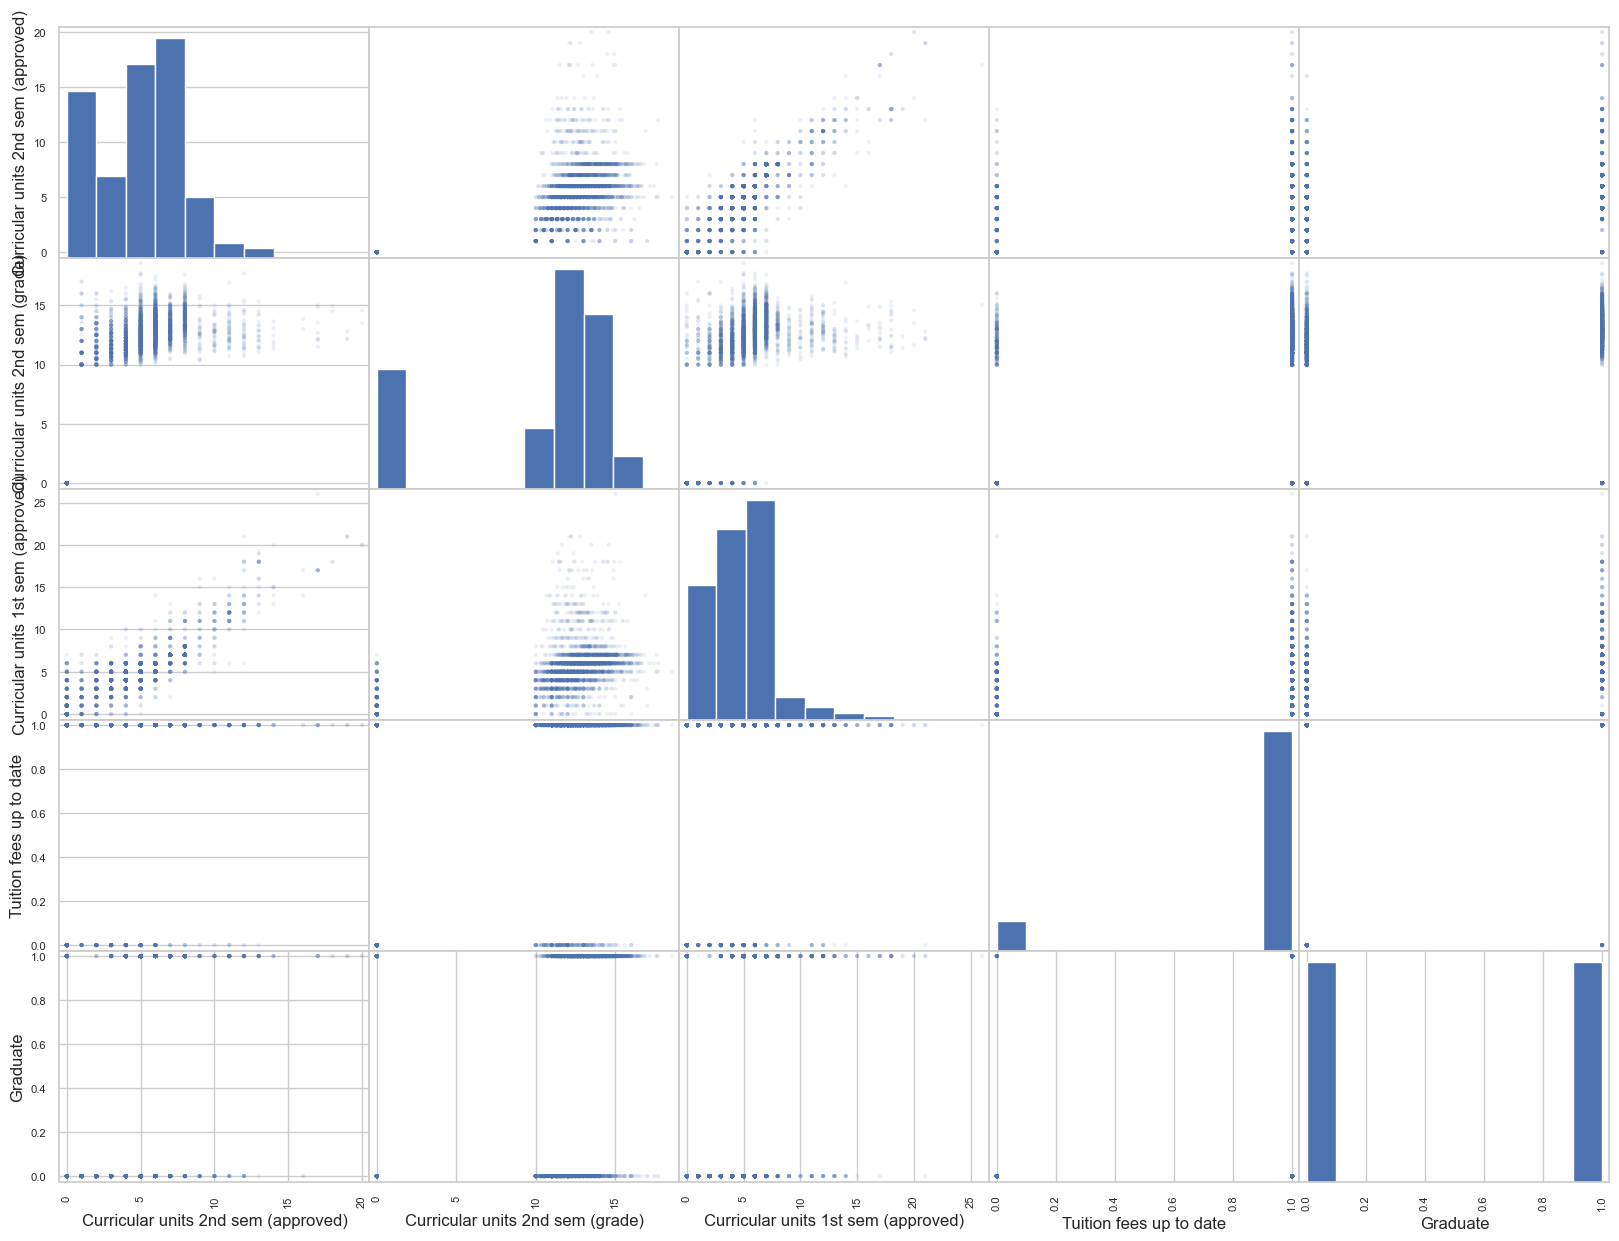

In [86]:
#scatter matrix to plot the correlation between attributes 
arr = ['Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 
       'Curricular units 1st sem (approved)', 'Tuition fees up to date','Graduate']
scatter_matrix(data[arr], figsize=(20, 15), alpha=0.1)

<AxesSubplot:xlabel='Target', ylabel='Curricular units 1st sem (grade)'>

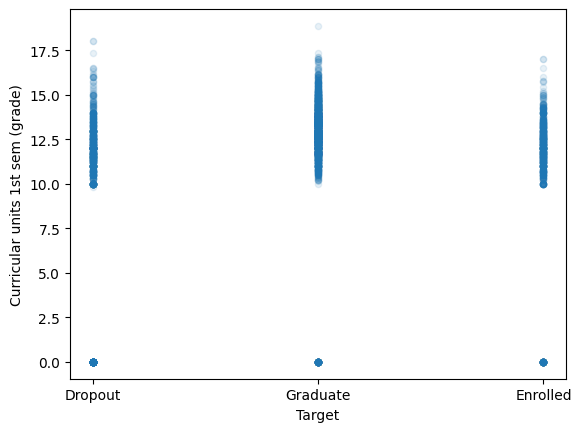

In [35]:
#correlation scatter plot of 2nd semester passed
data.plot(kind='scatter', x='Target', y='Curricular units 1st sem (grade)',
         alpha=0.1)

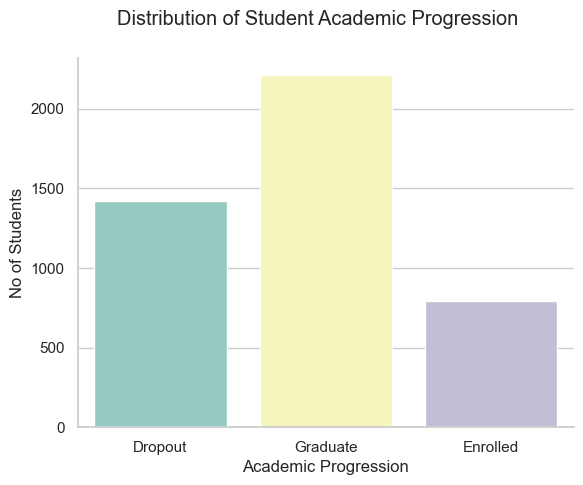

In [68]:
#visualising the distribution of students academic progression 
from matplotlib.pyplot import suptitle
import seaborn as sns
from seaborn import despine

sns.set(style="whitegrid")

ax=sns.countplot(x='Target',palette="Set3", data=data)
ax.set_xticklabels(["Dropout","Graduate", 'Enrolled'])
ax.set_ylabel("No of Students")
ax.set_xlabel("Academic Progression")
suptitle("Distribution of Student Academic Progression")
despine()

In [69]:
#describe of the target variables 
data.groupby('Target').describe()

Marital status                                               \
                  count      mean       std  min  25%  50%  75%  max   
Target                                                                 
Dropout          1421.0  1.261084  0.721958  1.0  1.0  1.0  1.0  6.0   
Enrolled          794.0  1.152393  0.571011  1.0  1.0  1.0  1.0  6.0   
Graduate         2209.0  1.134903  0.525526  1.0  1.0  1.0  1.0  6.0   

         Application mode             ... Enrolled      Graduate            \
                    count       mean  ...      75%  max    count mean  std   
Target                                ...                                    
Dropout            1421.0  23.712878  ...      0.0  0.0   1421.0  0.0  0.0   
Enrolled            794.0  19.799748  ...      1.0  1.0    794.0  0.0  0.0   
Graduate           2209.0  15.018108  ...      0.0  0.0   2209.0  1.0  0.0   

                                   
          min  25%  50%  75%  max  
Target                             
Dropout   0.0  0.0  0.0  0.0  0.0  
Enrolled  0.0  0.0  0.0  0.0  0.0  
Graduate  1.0  1.0  1.0  1.0  1.0  

[3 rows x 312 columns]

In [70]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Dropout,Enrolled,Graduate
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,0.321203,0.179476,0.499322
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.466991,0.383793,0.500056
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000,0.000000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,0.000000,0.000000,0.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,1.000000,0.000000,1.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,1.000000,1.000000,1.000000


In [39]:
#checking a few values using a scatterplot
#attributes = ['Course']
data.shape #check the shape of the data, contains 4424 values, 37 features

(4424, 38)

In [86]:
#data['Gender'].astype #cast an entire object to a specific type 


In [71]:
data.dtypes

Marital status                                       int64
Application mode                                     int64
Application order                                    int64
Course                                               int64
Daytime/evening attendance\t                         int64
Previous qualification                               int64
Previous qualification (grade)                     float64
Nacionality                                          int64
Mother's qualification                               int64
Father's qualification                               int64
Mother's occupation                                  int64
Father's occupation                                  int64
Admission grade                                    float64
Displaced                                            int64
Educational special needs                            int64
Debtor                                               int64
Tuition fees up to date                              int

In [72]:
data['Target'].value_counts() #find what categories exist , and the no that belong to them 

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [73]:
#scaling the numerical data 
x_data= school_num
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x_data)

In [74]:
x_scaled

array([[0.        , 0.28571429, 0.55555556, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.25      , 0.11111111, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.55555556, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.11111111, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.11111111, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.16071429, 0.11111111, ..., 0.        , 0.        ,
        1.        ]])

In [75]:
#splitting the data for stratifiedkfold cross validation 
from sklearn.model_selection import StratifiedKFold
X = school_num.iloc[:,school_num.columns != 'Target Encoded']
y = school_num.iloc[:, school_num.columns == 'Target Encoded']
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

IndexingError: Too many indexers

In [109]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
skf.get_n_splits(X, y)

10

In [101]:
print(skf)

StratifiedKFold(n_splits=5, random_state=1, shuffle=True)


In [110]:
#random forest classifer 
clf = RandomForestClassifier(max_depth=2, random_state=0)


In [111]:
#performing stratified kfold validation and training a random forest classifier 
for train_index, test_index in skf.split(x_scaled, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    clf.fit(X_train,y_train.values.ravel())
    rfc_pred = clf.predict(X_test)
    print('Accuracy:',accuracy_score(y_test,rfc_pred))


Accuracy: 0.7223476297968398
Accuracy: 0.7065462753950339
Accuracy: 0.7268623024830699
Accuracy: 0.7358916478555305
Accuracy: 0.751131221719457
Accuracy: 0.7013574660633484
Accuracy: 0.6968325791855203
Accuracy: 0.7036199095022625
Accuracy: 0.7217194570135747
Accuracy: 0.6968325791855203


In [197]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(clf, X_train, y_train.values.ravel(), cv =3)

In [198]:
confusion_matrix(y_train, y_train_pred)

array([[ 972,    0,  307],
       [ 268,    0,  447],
       [  96,    0, 1892]])

In [112]:
from sklearn.metrics import confusion_matrix


confusion_matrix_forest = confusion_matrix(y_test, rfc_pred)
print(confusion_matrix_forest)

[[101   0  41]
 [ 26   0  53]
 [ 14   0 207]]


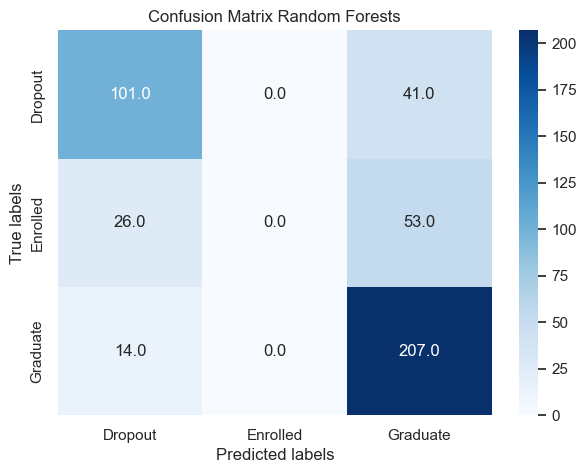

In [118]:
#plotting a confusion matrix
labels = ['Dropout', 'Enrolled', 'Graduate']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(confusion_matrix_forest,cmap="Blues",annot=True,fmt='.1f', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Random Forests'); 

In [107]:
F1_score = metrics.f1_score(y_test, rfc_pred, average='micro')
print('F1 score: ', F1_score)

F1 score: 0.7092760180995475


In [195]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       142
           1       0.00      0.00      0.00        79
           2       0.69      0.94      0.79       221

    accuracy                           0.70       442
   macro avg       0.47      0.55      0.50       442
weighted avg       0.57      0.70      0.63       442



/opt/miniconda3/envs/schoolwork/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/schoolwork/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/schoolwork/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


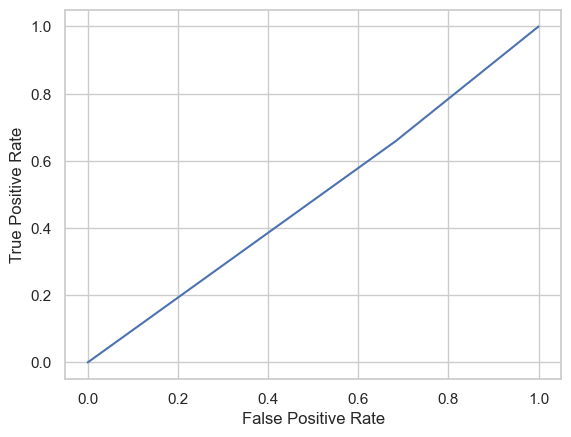

In [97]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay



fpr, tpr, _ = roc_curve(y_test, rfc_pred, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [134]:
#performing grid search with 10kfold cross validation 
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(cv=10, estimator=RandomForestClassifier (n_jobs=-1, random_state=42),
             n_jobs =-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         "min_samples_leaf": [5, 10, 20, 50, 100, 200],
                         "n_estimators": [10, 25,30, 50, 100, 200]},scoring= 'accuracy',
                         verbose=1)

In [137]:
grid_search.fit(X_train, y_train.values.ravel())

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [138]:
#finding the best score 
grid_search.best_score_

0.7699682623644538

In [139]:
#getting the best estimator
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

/opt/miniconda3/envs/schoolwork/lib/python3.8/site-packages/sklearn/tree/_export.py:677: UserWarning: Glyph 9 (	) missing from current font.
  ann.update_bbox_position_size(renderer)
/opt/miniconda3/envs/schoolwork/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/opt/miniconda3/envs/schoolwork/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


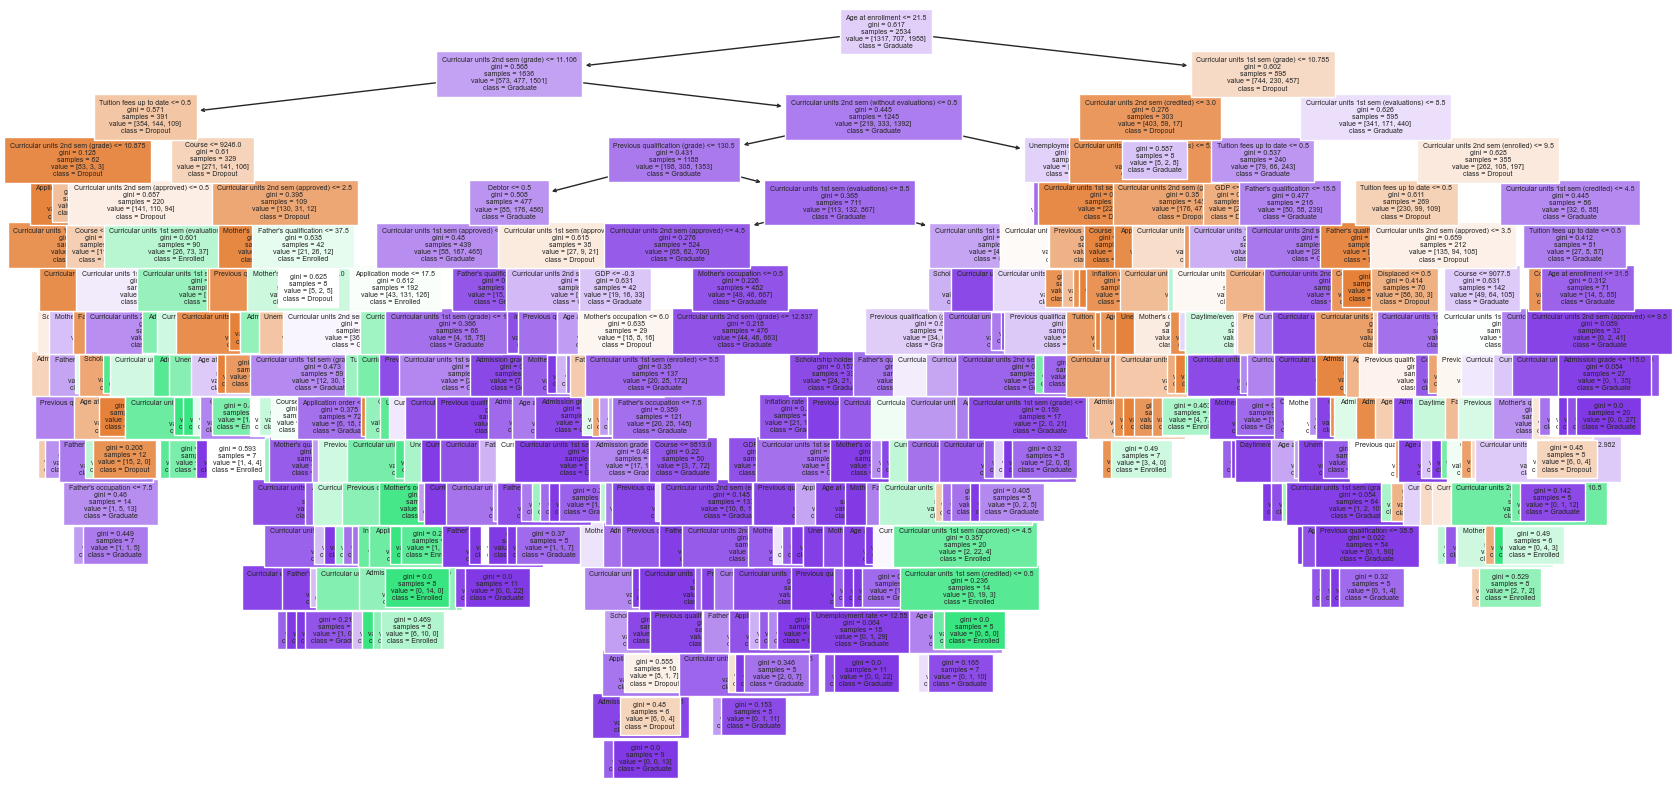

In [145]:
#visualisation of the best estimator
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(rf_best.estimators_[5], 
          feature_names = X.columns,class_names=['Dropout', "Enrolled", 'Graduate'],
          filled=True, fontsize=5);

/opt/miniconda3/envs/schoolwork/lib/python3.8/site-packages/sklearn/tree/_export.py:677: UserWarning: Glyph 9 (	) missing from current font.
  ann.update_bbox_position_size(renderer)
/opt/miniconda3/envs/schoolwork/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/opt/miniconda3/envs/schoolwork/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


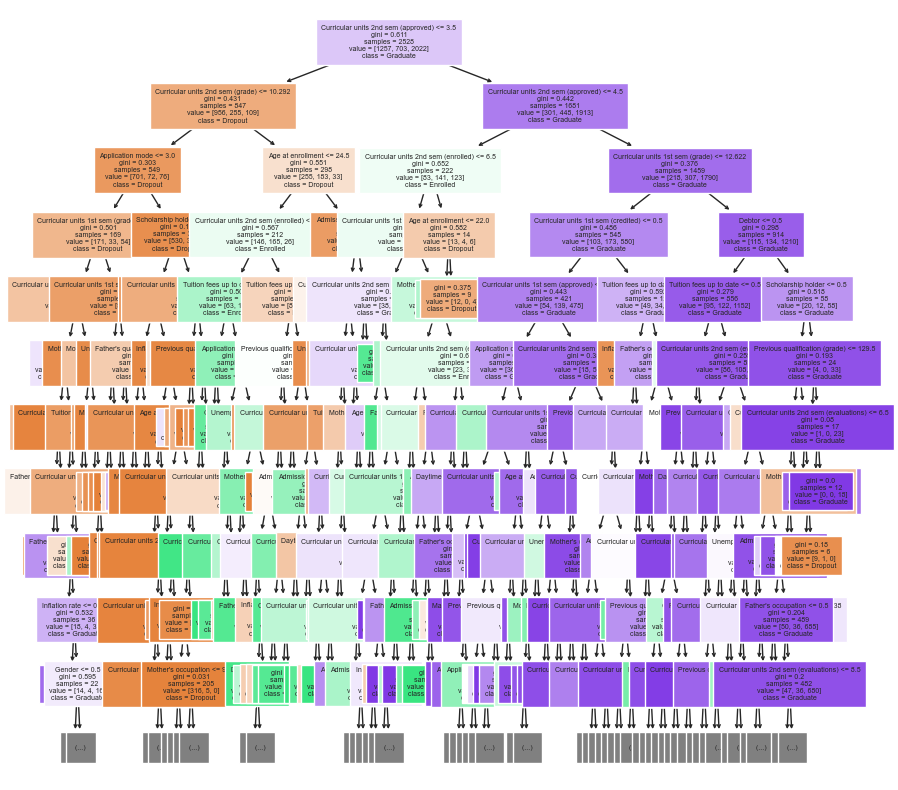

In [147]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(rf_best.estimators_[10],max_depth=10,
          feature_names = X.columns,class_names=['Dropout', "Enrolled", 'Graduate'],
          filled=True, fontsize=5);

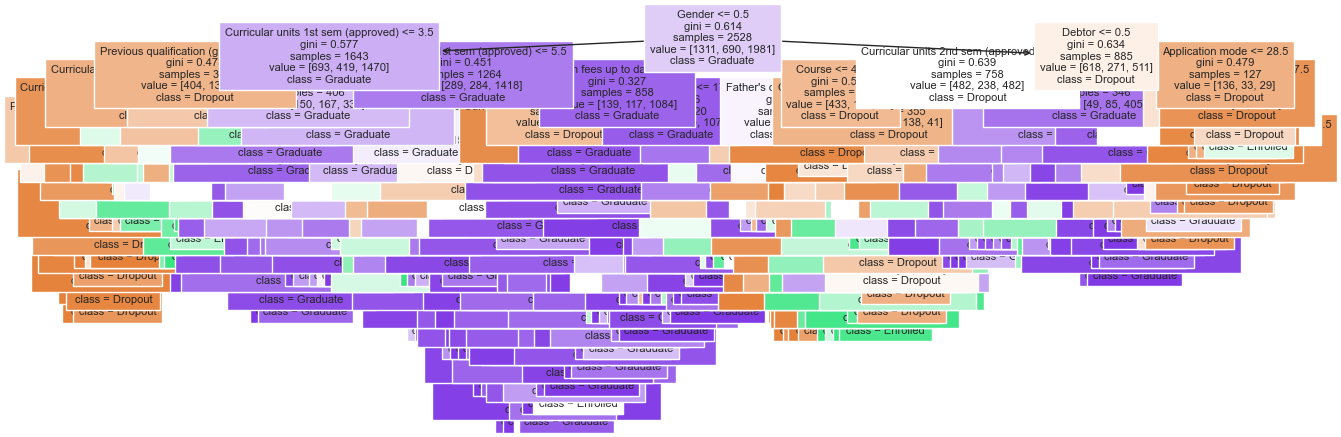

In [182]:
plt.figure(figsize=(15,5))
plot_tree(rf_best.estimators_[1],max_depth=20,
          feature_names = X.columns,class_names=['Dropout', "Enrolled", 'Graduate'],
          filled=True, fontsize=8);

In [148]:
#sorting out the data for feature importance
rf_best.feature_importances_

array([1.23899085e-03, 1.72481098e-02, 7.20117302e-03, 2.96562741e-02,
       1.42043785e-03, 2.75527113e-03, 2.28002883e-02, 2.30312335e-04,
       1.22182070e-02, 1.20806426e-02, 1.47995408e-02, 1.56467303e-02,
       2.75527048e-02, 4.81704328e-03, 1.33466781e-05, 1.12544935e-02,
       5.42169865e-02, 8.47602903e-03, 2.06509084e-02, 3.41013729e-02,
       1.43029177e-04, 3.69771143e-03, 1.95941652e-02, 3.36098699e-02,
       1.15941649e-01, 7.07146720e-02, 2.20722359e-03, 3.47366738e-03,
       2.53022726e-02, 3.84712044e-02, 2.25617024e-01, 1.17158407e-01,
       1.63331621e-03, 1.44863550e-02, 1.38950759e-02, 1.56754931e-02])

In [149]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [150]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
30,Curricular units 2nd sem (approved),0.225617
31,Curricular units 2nd sem (grade),0.117158
24,Curricular units 1st sem (approved),0.115942
25,Curricular units 1st sem (grade),0.070715
16,Tuition fees up to date,0.054217
29,Curricular units 2nd sem (evaluations),0.038471
19,Age at enrollment,0.034101
23,Curricular units 1st sem (evaluations),0.033610
3,Course,0.029656
12,Admission grade,0.027553


In [151]:
#testing the new grid searched classifier on the test set 
y_pred_bestrfc = rf_best.predict(X_test)

In [164]:
#getting the accuracy 
print('Accuracy:',accuracy_score(y_test,y_pred_bestrfc))

Accuracy: 0.755656108597285


In [153]:
#confusion matrix of the new classifer 
confusion_matrix_forest = confusion_matrix(y_test, y_pred_bestrfc)
print(confusion_matrix_forest)

[[105  15  22]
 [ 16  21  42]
 [  4   9 208]]


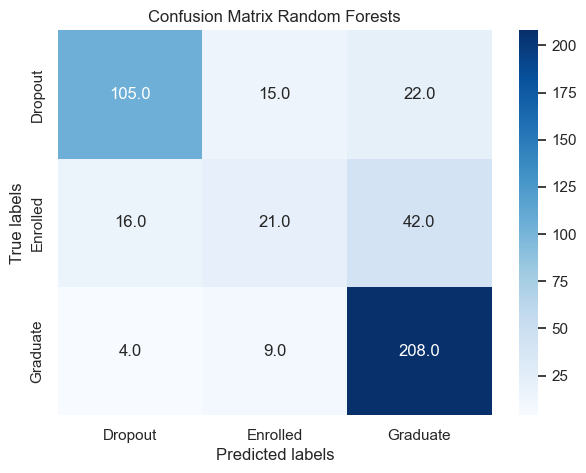

In [154]:
#visualising the confusion matrix 
labels = ['Dropout', 'Enrolled', 'Graduate']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(confusion_matrix_forest,cmap="Blues",annot=True,fmt='.1f', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Random Forests'); 

In [160]:
#validating the data 
print(classification_report(y_test, y_pred_bestrfc))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79       142
           1       0.47      0.27      0.34        79
           2       0.76      0.94      0.84       221

    accuracy                           0.76       442
   macro avg       0.69      0.65      0.66       442
weighted avg       0.74      0.76      0.74       442



In [201]:
#plot the aoc
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc


y_score_rfc = rf_best.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score_rfc, pos_label=1)
roc_auc_forests = auc(fpr, tpr)

print(roc_auc_forests)

0.8082435401192593


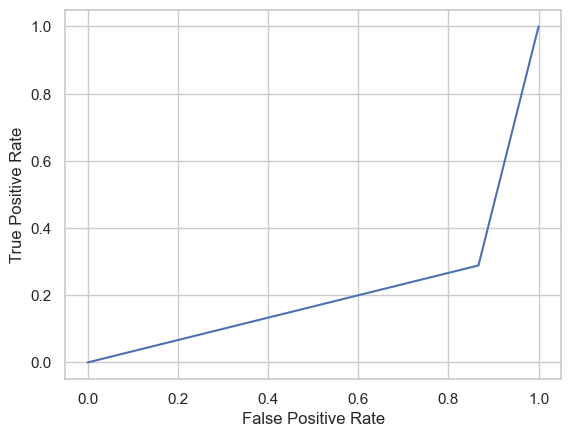

In [168]:
#ploting the roc curve for one of the classes after optimisation 
from sklearn.metrics import RocCurveDisplay



fpr, tpr, _ = roc_curve(y_test, rfc_pred, pos_label=clf.classes_[3])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

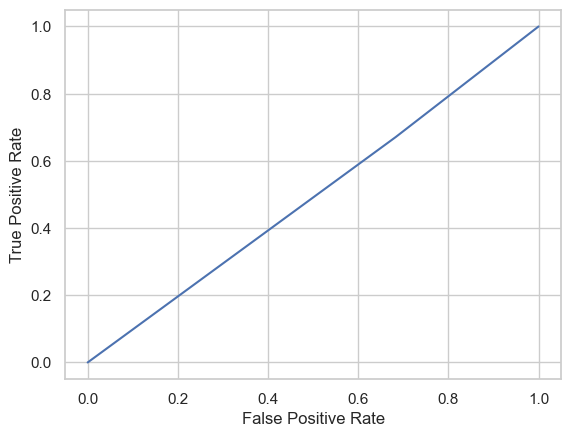

In [169]:
fpr, tpr, _ = roc_curve(y_test, rfc_pred, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

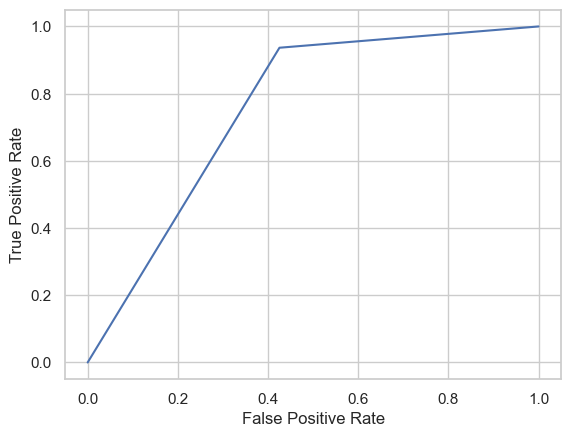

In [183]:
fpr, tpr, _ = roc_curve(y_test, rfc_pred, pos_label=clf.classes_[2])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [193]:
#check cross validation score 
rf_best.predict_proba(X_train)

array([[0.61658175, 0.12154158, 0.26187667],
       [0.18771016, 0.07215327, 0.74013657],
       [0.98175978, 0.01128283, 0.00695739],
       ...,
       [0.53367345, 0.13926098, 0.32706557],
       [0.03708362, 0.05148703, 0.91142934],
       [0.08254469, 0.07700892, 0.84044639]])

In [98]:
agronomy_drop = df_1.loc[(df_1['Course'] ==9003 ) & (df_1['Target'] == 'Dropout'),
        ['Course', 'Target']]
agronomy_drop.value_counts()

Course  Target 
9003    Dropout    86
dtype: int64

In [107]:
admission_grade = df_1.loc[(df_1['Admission grade'] >100 ) & (df_1['Target'] == 'Dropout'),
        ['Admission grade', 'Target']]
admission_grade.items

<bound method DataFrame.items of       Admission grade   Target
0               127.3  Dropout
2               124.8  Dropout
7               113.1  Dropout
9               123.0  Dropout
12              130.2  Dropout
...               ...      ...
4408            133.0  Dropout
4411            150.0  Dropout
4415            117.8  Dropout
4420            119.0  Dropout
4421            149.5  Dropout

[1335 rows x 2 columns]>

In [110]:
gender = df_1.loc[(df_1['Gender'] ==1 ) & (df_1['Target'] == 'Dropout'),
        ['Gender', 'Target']]
total = 1335 - 701
print(total)
gender

634


,Gender,Target
0,1,Dropout
2,1,Dropout
7,1,Dropout
35,1,Dropout
36,1,Dropout
...,...,...
4400,1,Dropout
4401,1,Dropout
4404,1,Dropout
4408,1,Dropout


In [144]:
len(gender)

701

In [112]:
marital_stats = df_1.loc[(df_1['Marital status'] ==1 ) & (df_1['Target'] == 'Dropout'),
        ['Marital status', 'Target']]
marital_stats

,Marital status,Target
0,1,Dropout
2,1,Dropout
7,1,Dropout
9,1,Dropout
12,1,Dropout
...,...,...
4395,1,Dropout
4401,1,Dropout
4411,1,Dropout
4420,1,Dropout


In [116]:
no_married =  data.loc[data['Marital status'] ==1]
no_married

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [81]:
df_1.columns


Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [91]:
#no of students who dropped out after the first semester
#df_1.loc[(df_1['Curricular units 1st sem (grade)'] >0 ) & (df_1['Target'] == 'Dropout'),
        # ['Curricular units 1st sem (grade)', 'Target']]
df_1.loc[df_1['Curricular units 1st sem (grade)'] >0, ['Curricular units 1st sem (grade)', 'Target']]

,Curricular units 1st sem (grade),Target
9,11.400000,Dropout
15,13.200000,Dropout
37,10.000000,Dropout
39,11.666667,Dropout
40,12.750000,Dropout
...,...,...
4408,11.400000,Dropout
4411,12.500000,Dropout
4415,12.333333,Dropout
4420,12.000000,Dropout


In [127]:
course_dropouts = df_1['Course'].value_counts()
course_dropouts

9991    136
9147    134
9500    118
9773    101
9254     96
9670     95
9119     92
9085     90
9003     86
9853     85
171      82
9130     78
8014     71
9238     65
9070     51
9556     33
33        8
Name: Course, dtype: int64

In [124]:
course_nos =data['Course'].value_counts() #count the values of course type
course_nos

9500    766
9147    380
9238    355
9085    337
9773    331
9991    268
9670    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: Course, dtype: int64

In [38]:
total_students = sum(course_nos)
total_dropouts = sum(course_dropouts) #get the total no of students that have enrolled and dropped out
students_left = total_students - total_dropouts
print('Total no of Students :', total_students, '\nTotal no of dropouts:', total_dropouts,
     '\nStudents left after dropout :', students_left)


NameError: name 'course_nos' is not defined